<a href="https://colab.research.google.com/github/PriyankaKocherla/fmml_assignments/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


The accuracy of the validation set can be affected when you change the percentage of data allocated to it during the training of a machine learning model. Here's how it typically behaves:

Increase Percentage of Validation Set:

Higher Confidence: With a larger validation set, you have a higher confidence in the model's performance because it's evaluated on a larger and more representative portion of the data. This can lead to a more reliable estimate of the model's accuracy.
Slower Training: However, increasing the validation set size may result in slower training since more data is reserved for validation, leaving less for training the model itself.
Risk of Overfitting: If the training set becomes too small due to a large validation set, it might lead to overfitting, where the model fits the training data too closely but doesn't generalize well to new, unseen data.
Reduce Percentage of Validation Set:

Faster Training: A smaller validation set speeds up the training process because more data is available for training the model.
Less Reliable Estimate: However, with a smaller validation set, your estimate of the model's performance might be less reliable and more prone to variability since it's based on a smaller sample.
Risk of Overfitting: There's a higher risk of overfitting because the model might not be adequately evaluated on a representative portion of the data, potentially leading to an overly optimistic view of its performance.
Choosing the right percentage for the validation set is a trade-off between model performance estimation, training speed, and the risk of overfitting. It often depends on the size and nature of your dataset, as well as the specific goals of your machine learning project. Cross-validation techniques, such as k-fold cross-validation, can also be used to mitigate some of these issues by repeatedly partitioning the data into training and validation set.



2nd  Answer:

Larger Training Set:

If you allocate a larger portion of your data to the training set, your model has more data to learn from. This can lead to a model that generalizes better, as it has been exposed to a wider range of examples.
However, if the validation set is relatively small, it might not be representative enough to reliably estimate your model's performance. You might get optimistic or pessimistic estimates of accuracy, depending on the specific subset of data used for validation.
Larger Validation Set:

A larger validation set provides a more reliable estimate of your model's performance because it is evaluated on a larger, more representative portion of your data.
However, if the training set becomes too small due to a large validation set, it could lead to overfitting, where the model fits the training data too closely but doesn't generalize well to new, unseen data.
Balanced Split:

Ideally, you want a balanced split that allocates a sufficient amount of data to both the training and validation sets. This allows your model to learn effectively while still obtaining a reliable estimate of its performance.
The balance between the training and validation sets depends on factors like the total dataset size and the complexity of your model. Common splits include 70-30, 80-20, or 90-10 for training-validation ratios.
In summary, finding the right balance between the sizes of the training and validation sets is crucial. It depends on the characteristics of your dataset and the goals of your machine learning project. A well-chosen split ensures that your model learns effectively and provides a reasonable estimate of its performance on unseen data, which is typically evaluated using a separate test set. Cross-validation techniques can also be used to assess model performance more reliably, especially when dealing with limited d

3rd Answer:


The percentage to reserve for the validation set, while balancing the need for model training and reliable performance estimation, depends on several factors, including the size of your dataset and the complexity of your model. However, a common practice is to allocate around 20-30% of your dataset to the validation set.

Here are some considerations:

Small Datasets: If you have a relatively small dataset (e.g., hundreds or a few thousand data points), you might lean towards a larger validation set, such as 20-30%, to ensure a more representative sample for performance estimation.

Large Datasets: If your dataset is quite large (e.g., tens of thousands or more data points), you can allocate a smaller percentage to the validation set, like 10-20%, because there's already a substantial amount of data available for training.

Complex Models: If you're training a highly complex model, you might want a larger validation set to ensure that your model isn't overfitting. Complex models have more capacity to fit the training data closely, so a larger validation set can help detect overfitting.

Simple Models: For simpler models with lower capacity, you might be able to get away with a slightly smaller validation set since they are less prone to overfitting.

Remember that these percentages are not strict rules but general guidelines. You should also consider using techniques like k-fold cross-validation if you have limited data. Cross-validation involves splitting your data into multiple folds, repeatedly training and validating your model on different subsets, and then averaging the results. This provides a more robust estimate of your model's performance.

Ultimately, the choice of the validation set size should be driven by your specific dataset and project goals, and it may require some experimentation to find the optimal balance.

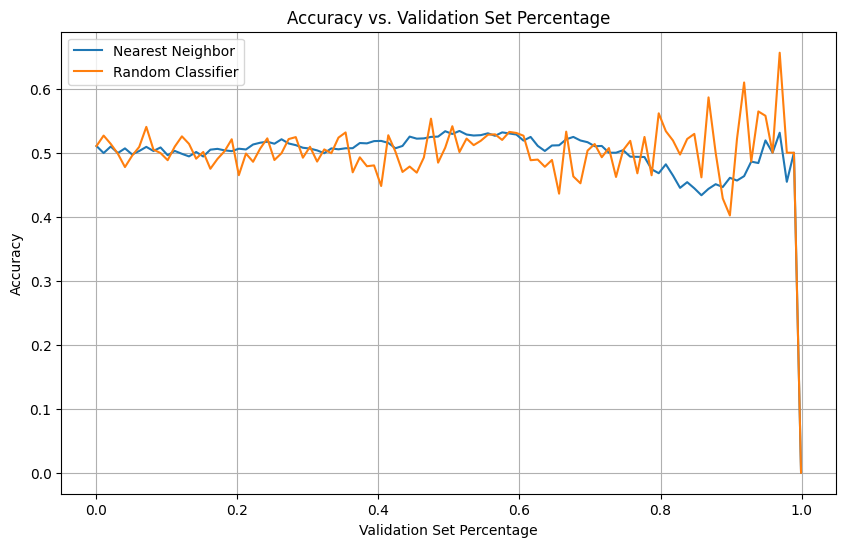

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Generate some synthetic data
X = np.random.rand(1000, 2)  # 1000 samples, 2 features
y = np.random.randint(2, size=1000)  # Binary classification labels

validation_splits = np.linspace(0.001, 0.999, 100)  # Vary the validation split from 0.1% to 99.9%
nn_scores = []  # Store nearest neighbor classifier accuracy scores
random_scores = []  # Store random classifier accuracy scores

for split in validation_splits:
    # Split the data into training and validation sets
    split_idx = int(split * len(X))
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    # Nearest Neighbor Classifier
    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(X_train, y_train)
    nn_pred = nn_classifier.predict(X_val)
    nn_accuracy = accuracy_score(y_val, nn_pred)
    nn_scores.append(nn_accuracy)

    # Random Classifier (DummyClassifier)
    random_classifier = DummyClassifier(strategy="uniform")
    random_classifier.fit(X_train, y_train)
    random_pred = random_classifier.predict(X_val)
    random_accuracy = accuracy_score(y_val, random_pred)
    random_scores.append(random_accuracy)

# Create a plot to visualize the results
plt.figure(figsize=(10, 6))
plt.plot(validation_splits, nn_scores, label="Nearest Neighbor")
plt.plot(validation_splits, random_scores, label="Random Classifier")
plt.xlabel("Validation Set Percentage")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Validation Set Percentage")
plt.legend()
plt.grid(True)
plt.show()

4th Answer:

Yes, averaging the validation accuracy across multiple splits of your data (using techniques like k-fold cross-validation) can provide more consistent and reliable results compared to a single split. This is because it helps mitigate the impact of data variability and ensures that your model's performance estimate is more robust. Here's why it's beneficial:

Reduced Variability: By repeatedly splitting your data into different subsets for training and validation, you reduce the impact of random data variations. A single split can lead to overfitting or underestimating model performance due to the specific subset used. Averaging over multiple splits smooths out these variations.

Better Generalization: Cross-validation allows your model to be evaluated on different parts of the data, making it better at generalizing to unseen data. This provides a more realistic estimate of how your model will perform in real-world scenarios.

More Comprehensive Evaluation: Cross-validation assesses your model's performance across various data configurations. It's particularly useful when your dataset is limited or unbalanced because it ensures that each data point is used for validation at least once.

Model Selection: When comparing different models or hyperparameters, cross-validation provides a fair basis for comparison. It helps you choose the model that performs consistently well across different data splits
Cross-validation, such as k-fold cross-validation, provides a more accurate estimation of test accuracy compared to a single validation split. While it's important to note that cross-validation doesn't directly estimate the accuracy on a completely unseen test dataset (as the test dataset is meant to be entirely separate), it does provide a more reliable approximation of how your model is likely to perform on new, unseen data. Here's why:

Reduced Overfitting or Luck Influence: With a single validation split, your model's performance estimate can be heavily influenced by the specific subset of data chosen for validation. This can lead to overfitting to that particular subset or, conversely, underestimating the model's performance due to bad luck in the selection of the validation set. Cross-validation mitigates this issue by repeatedly splitting the data, reducing the influence of randomness.

Comprehensive Assessment: Cross-validation assesses your model's performance across multiple, different validation sets. It effectively "tests" your model on various portions of your dataset, allowing it to learn and generalize better. This provides a more comprehensive understanding of how your model is likely to perform on new data.

Model Selection: Cross-validation is often used not only for performance estimation but also for model selection and hyperparameter tuning. It helps identify models that consistently perform well across different data splits, which is a valuable indicator of how a model will perform on unseen data.

In the context of machine learning, the number of iterations can have an impact on the estimate of model performance when using techniques like k-fold cross-validation or bootstrapping. Generally, increasing the number of iterations tends to provide a more stable and reliable estimate of model performance. Here's why:

Reduced Variability: With more iterations, the estimate of performance becomes less sensitive to the specific random splits of the data. Each iteration represents a different subset of data for training and validation, and increasing the number of iterations reduces the influence of randomness or the choice of a specific subset.

Smoothing Effects: More iterations allow for a smoother and more representative distribution of performance scores. Averaging performance across a larger number of iterations helps smooth out any outliers or extreme values that may occur in a smaller number of iterations.

Better Confidence: As you increase the number of iterations, you gain greater confidence in the stability of your performance estimate. You can be more certain that the estimate is representative of your model's true performance.

However, there are practical trade-offs to consider when choosing the number of iterations:

Computational Cost: Increasing the number of iterations requires more computational resources and time. You should balance the computational cost with the benefits of a more accurate estimate.

Diminishing Returns: There may be diminishing returns in terms of accuracy gains as you increase the number of iterations. At some point, the added computational cost may not significantly improve the estimate's stability.

In practice, common choices for the number of iterations in cross-validation are 5-fold, 10-fold, or even leave-one-out cross-validation (where each data point is treated as a separate validation set).
Increasing the number of iterations in techniques like k-fold cross-validation can help compensate for having a smaller training or validation dataset to some extent. However, there are limitations to how much you can mitigate the effects of small datasets solely by increasing iterations:

Training Dataset Size:

Increasing the number of iterations primarily helps with the stability and reliability of the performance estimate. It can provide a more representative sample of the data for training and validation.
However, if your training dataset is extremely small, even with more iterations, the model may not have sufficient data to learn meaningful patterns, especially for complex models. In such cases, the model might underperform or overfit.
Validation Dataset Size:

A larger validation dataset obtained through more iterations can provide more reliable estimates of model performance.
However, if your validation dataset is very small, it may not be representative of the overall data distribution. This can lead to inaccurate estimates of model performance, as the validation set may not adequately cover the diversity of the data.
Trade-offs:

Increasing the number of iterations comes with computational costs. The time and resources required for training and evaluating the model multiple times can become significant.
There's a practical limit to the improvement you can achieve by increasing iterations. If the dataset is extremely small, you may still face challenges in building a robust model or obtaining highly reliable performance estimates.
In summary, while increasing iterations in cross-validation can help improve the reliability of performance estimates when dealing with small training or validation datasets, it's not a substitute for having a reasonably sized dataset. The fundamental limitations imposed by the dataset size, such as the ability of the model to learn meaningful patterns, still apply. If you have very limited data, you should consider strategies like data augmentation, transfer learning, or collecting more data if possible to improve your model's performance and the reliability of performance estimates.
